In [1]:
import pandas as pd
import sys 
sys.path.append('/home/aistudio/external-libraries')


# Read the Excel file to understand its structure
file_path = '/home/aistudio/work/每日各品类销量及利润分析.xlsx'
xl = pd.ExcelFile(file_path)

df = pd.read_excel(file_path, sheet_name='Sheet1')

df.head()

,Unnamed: 0,Unnamed: 1,水生根茎类_销量(千克),花叶类_销量(千克),花菜类_销量(千克),茄类_销量(千克),辣椒类_销量(千克),食用菌_销量(千克),水生根茎类_利润,花叶类_利润,花菜类_利润,茄类_利润,辣椒类_利润,食用菌_利润,水生根茎类_利润率,花叶类_利润率,花菜类_利润率,茄类_利润率,辣椒类_利润率,食用菌_利润率
0,2020-07-01,3,4.850,205.402,46.640,35.374,76.715,35.365,25.49812,512.10105,200.71800,32.08965,351.93465,138.66059,0.714238,0.526693,0.511141,0.632999,0.876177,0.597930
1,2020-07-02,4,4.600,198.362,43.943,32.199,66.064,48.510,20.48956,583.96795,201.69822,92.46514,292.84857,251.18003,0.703021,0.711268,0.591160,1.341366,0.806968,0.680904
2,2020-07-03,5,9.572,190.779,42.076,35.896,64.253,42.442,22.99408,561.73894,182.90884,53.94768,268.84345,234.01637,0.461676,0.675462,0.594906,0.755759,0.725987,0.743286
3,2020-07-04,6,5.439,236.587,55.662,57.067,81.282,47.262,42.52497,704.10491,244.78158,149.64214,361.91539,232.02942,0.685346,0.624207,0.553579,0.860294,0.837712,0.670419
4,2020-07-05,7,4.019,223.899,55.474,61.816,98.496,73.213,18.40702,616.37082,232.15808,162.74564,421.20867,301.72841,0.845018,0.651440,0.511039,0.716825,0.786806,0.714895


In [2]:
!pip install -U prophet -t /home/aistudio/external-libraries

Looking in indexes: https://mirror.baidu.com/pypi/simple/, https://mirrors.aliyun.com/pypi/simple/, https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 828.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 1.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 838.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 923.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 959.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 934.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 570.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [99]:
df.rename(columns={'Unnamed: 0': '日期', 'Unnamed: 1': '星期几'}, inplace=True)

df.head()

,日期,星期几,水生根茎类_销量(千克),花叶类_销量(千克),花菜类_销量(千克),茄类_销量(千克),辣椒类_销量(千克),食用菌_销量(千克),水生根茎类_利润,花叶类_利润,花菜类_利润,茄类_利润,辣椒类_利润,食用菌_利润,水生根茎类_利润率,花叶类_利润率,花菜类_利润率,茄类_利润率,辣椒类_利润率,食用菌_利润率
0,2020-07-01,3,4.850,205.402,46.640,35.374,76.715,35.365,25.49812,512.10105,200.71800,32.08965,351.93465,138.66059,0.714238,0.526693,0.511141,0.632999,0.876177,0.597930
1,2020-07-02,4,4.600,198.362,43.943,32.199,66.064,48.510,20.48956,583.96795,201.69822,92.46514,292.84857,251.18003,0.703021,0.711268,0.591160,1.341366,0.806968,0.680904
2,2020-07-03,5,9.572,190.779,42.076,35.896,64.253,42.442,22.99408,561.73894,182.90884,53.94768,268.84345,234.01637,0.461676,0.675462,0.594906,0.755759,0.725987,0.743286
3,2020-07-04,6,5.439,236.587,55.662,57.067,81.282,47.262,42.52497,704.10491,244.78158,149.64214,361.91539,232.02942,0.685346,0.624207,0.553579,0.860294,0.837712,0.670419
4,2020-07-05,7,4.019,223.899,55.474,61.816,98.496,73.213,18.40702,616.37082,232.15808,162.74564,421.20867,301.72841,0.845018,0.651440,0.511039,0.716825,0.786806,0.714895


In [100]:
# 检查缺失值
missing_data = df.isnull().sum()
missing_data

日期               0
星期几              0
水生根茎类_销量(千克)     0
花叶类_销量(千克)       0
花菜类_销量(千克)       1
茄类_销量(千克)       35
辣椒类_销量(千克)       0
食用菌_销量(千克)       0
水生根茎类_利润         0
花叶类_利润           0
花菜类_利润           1
茄类_利润           35
辣椒类_利润           0
食用菌_利润           0
水生根茎类_利润率        0
花叶类_利润率          0
花菜类_利润率          1
茄类_利润率          35
辣椒类_利润率          0
食用菌_利润率          0
dtype: int64

In [101]:
# 根据其实际意义选择用0填补
df.fillna(0, inplace=True)

df.isnull().sum().sum()

0

03:33:36 - cmdstanpy - INFO - Chain [1] start processing
03:33:36 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' n

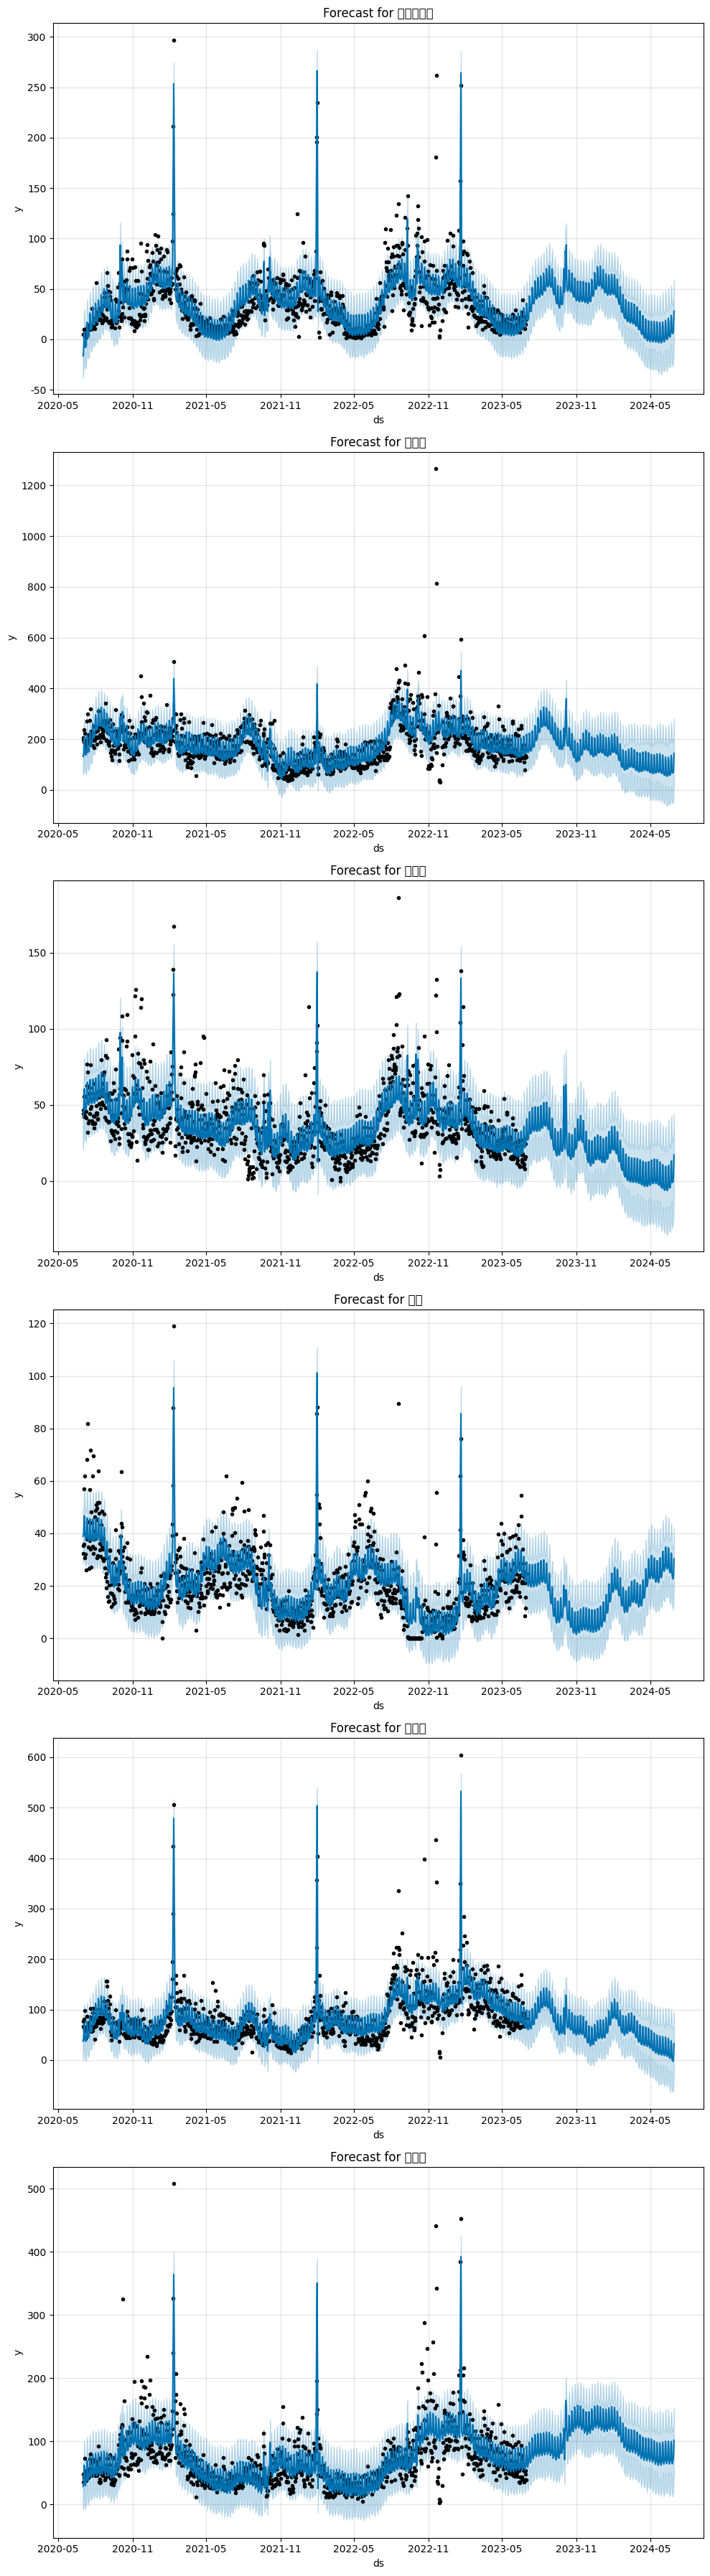

In [102]:
# 创建节假日数据框
holidays = pd.DataFrame({
  'holiday': ['chinese_new_year', 'chinese_new_year', 'chinese_new_year', 'chinese_new_year', 
              'national_day', 'national_day', 'national_day', 'national_day',
              'mid_autumn_festival', 'mid_autumn_festival', 'mid_autumn_festival'],
  'ds': pd.to_datetime(['2020-01-25', '2021-02-12', '2022-02-01', '2023-01-22',
                        '2020-10-01', '2021-10-01', '2022-10-01', '2023-10-01',
                        '2020-10-01', '2021-09-21', '2022-09-10']),
  'lower_window': [-4, -4, -4, -4, -1, -1, -1, -1, -1, -1, -1],
  'upper_window': [0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0],
})


# List of vegetable categories
veg_categories = ['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌']

# 创建一个大图
fig, axes = plt.subplots(len(veg_categories), 1, figsize=(10, 6 * len(veg_categories)))

# 循环遍历每一个蔬菜类别
for i, veg in enumerate(veg_categories):
    # 准备数据
    df_prophet = df[['日期', f'{veg}_销量(千克)']].rename(columns={'日期': 'ds', f'{veg}_销量(千克)': 'y'})
    df_prophet = df_prophet.dropna(subset=['y'])  # 移除 'y' 为 NaN 的行
    
    # 初始化和拟合 Prophet 模型，加入节假日信息
    model = Prophet(holidays=holidays)
    model.fit(df_prophet)
    
    # 创建未来的数据框并进行预测
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    
    # 绘制预测到子图上
    ax = axes[i]
    model.plot(forecast, ax=ax)
    ax.set_title(f'Forecast for {veg}')

# 保存整个图
plt.tight_layout()
plt.savefig("品类和销量.png")

# 展示图
plt.show()

03:34:09 - cmdstanpy - INFO - Chain [1] start processing
03:34:09 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' n

Predicted cost markup for 水生根茎类 from 2023-07-01 to 2023-07-07:
             ds      yhat
1085 2023-07-01  0.468135
1086 2023-07-02  0.503712
1087 2023-07-03  0.528974
1088 2023-07-04  1.914207
1089 2023-07-05  0.562505
1090 2023-07-06  0.618288
1091 2023-07-07  0.656012


03:34:10 - cmdstanpy - INFO - Chain [1] start processing
03:34:10 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 33550 (\N{CJK UNIFIED IDEOGRAPH-830E}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/p

Predicted cost markup for 花叶类 from 2023-07-01 to 2023-07-07:
             ds      yhat
1085 2023-07-01  0.523662
1086 2023-07-02  0.478174
1087 2023-07-03  0.484090
1088 2023-07-04  0.460916
1089 2023-07-05  0.494853
1090 2023-07-06  0.562949
1091 2023-07-07  0.864397


/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
03:34:11 - cmdstanpy - INFO - Chain [1] start processing
03:34:11 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


Predicted cost markup for 花菜类 from 2023-07-01 to 2023-07-07:
             ds      yhat
1085 2023-07-01  1.915908
1086 2023-07-02  0.602490
1087 2023-07-03  0.577156
1088 2023-07-04  0.592574
1089 2023-07-05  0.582327
1090 2023-07-06  0.543568
1091 2023-07-07  0.516477


/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 21494 (\N{CJK UNIFIED IDEOGRAPH-53F6}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
03:34:12 - cmdstanpy - INFO - Chain [1] start processing
03:34:12 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  fig.tight_layout()
/home/aistudio

Predicted cost markup for 茄类 from 2023-07-01 to 2023-07-07:
             ds      yhat
1085 2023-07-01  1.256824
1086 2023-07-02  1.262881
1087 2023-07-03  1.299710
1088 2023-07-04  2.623868
1089 2023-07-05  1.446842
1090 2023-07-06  1.514794
1091 2023-07-07  1.545024


/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
03:34:13 - cmdstanpy - INFO - Chain [1] start processing
03:34:13 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 33540 (\N{CJK UNIFIED IDEOGRAPH-8304}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.tight_layout()
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generi

Predicted cost markup for 辣椒类 from 2023-07-01 to 2023-07-07:
             ds      yhat
1085 2023-07-01  0.750287
1086 2023-07-02  0.740207
1087 2023-07-03  0.878485
1088 2023-07-04  0.765573
1089 2023-07-05  0.750816
1090 2023-07-06  0.731892
1091 2023-07-07  0.708797


/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
03:34:14 - cmdstanpy - INFO - Chain [1] start processing
03:34:14 - cmdstanpy - INFO - Chain [1] done processing
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


Predicted cost markup for 食用菌 from 2023-07-01 to 2023-07-07:
             ds      yhat
1085 2023-07-01  0.450911
1086 2023-07-02  0.429537
1087 2023-07-03  0.430062
1088 2023-07-04  0.420249
1089 2023-07-05  0.430606
1090 2023-07-06  0.429248
1091 2023-07-07  0.484551


/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 36771 (\N{CJK UNIFIED IDEOGRAPH-8FA3}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 26898 (\N{CJK UNIFIED IDEOGRAPH-6912}) missing from current font.
  fig.tight_layout()
/home/aistudio/external-libraries/prophet/plot.py:92: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.tight_layout()
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were foun

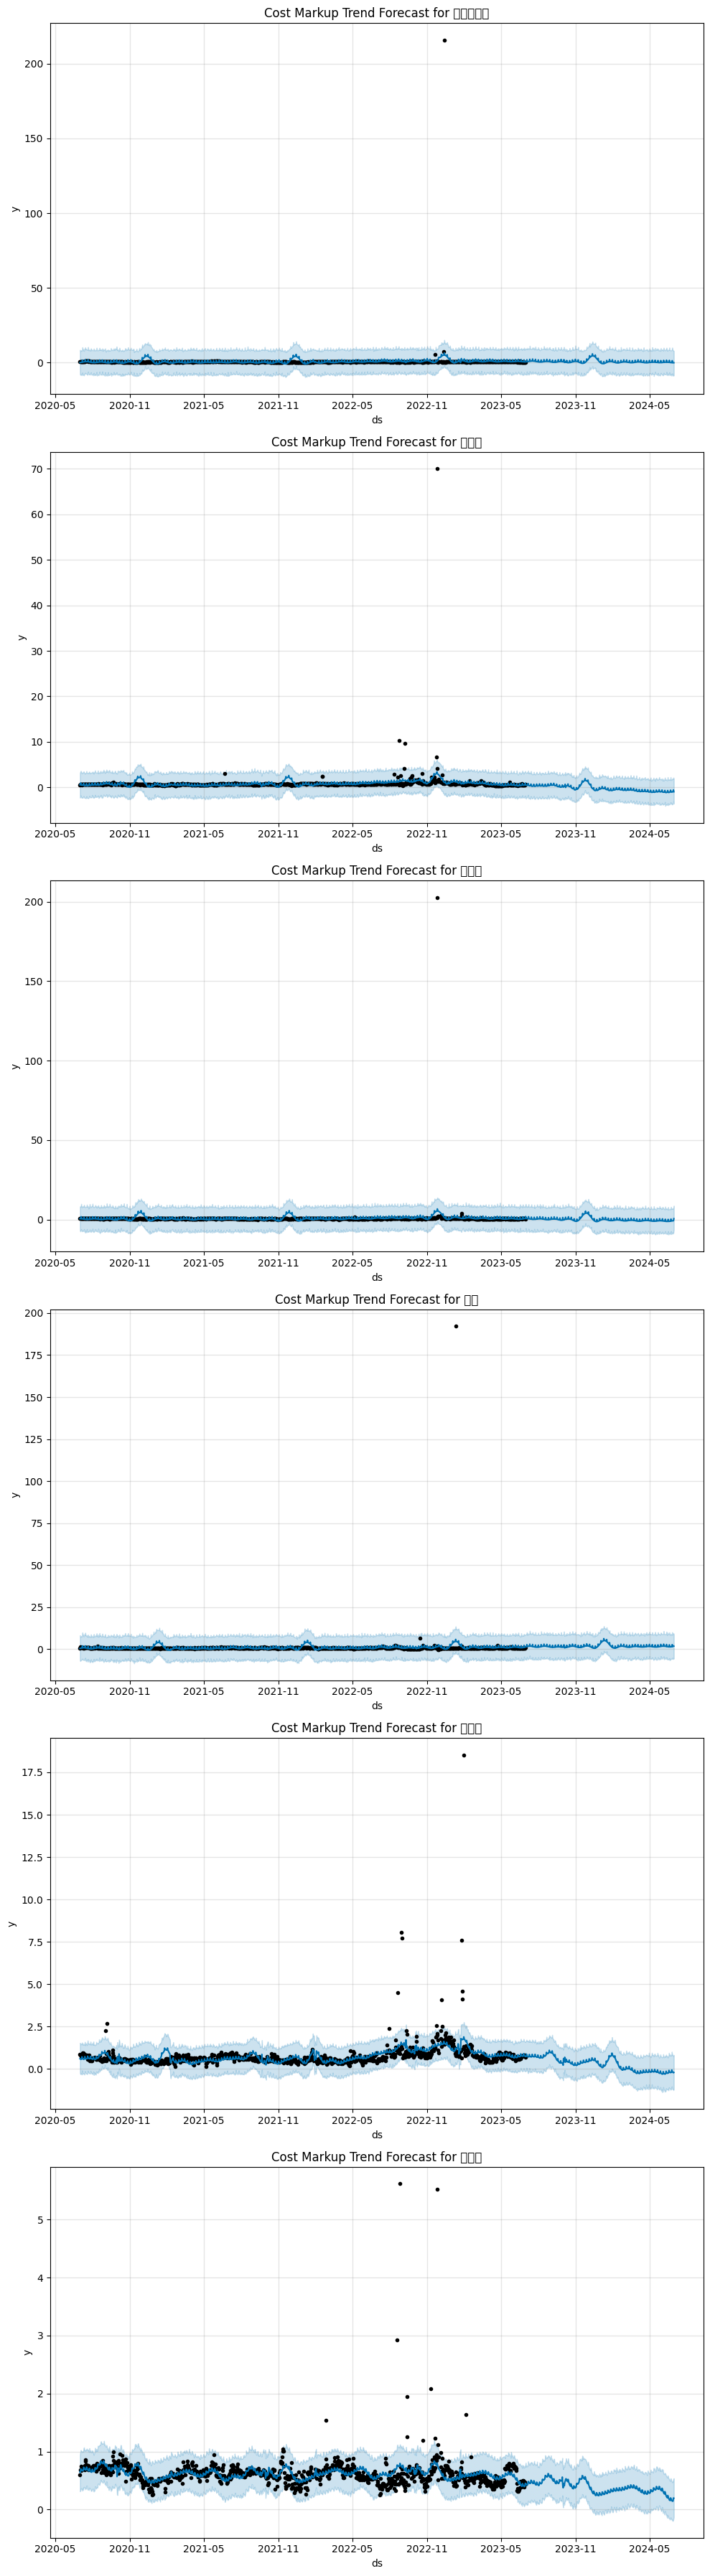

In [103]:
# 创建一个大图
fig, axes = plt.subplots(len(veg_categories), 1, figsize=(10, 6 * len(veg_categories)))

# 循环遍历每一个蔬菜类别
for i, veg in enumerate(veg_categories):
    # 准备数据
    df_prophet = df[['日期', f'{veg}_利润率']].rename(columns={'日期': 'ds', f'{veg}_利润率': 'y'})
    
    # 移除 'y' 为 NaN 的行
    df_prophet = df_prophet.dropna(subset=['y'])
    
    # 初始化和拟合 Prophet 模型，加入节假日信息
    model = Prophet(holidays=holidays)
    model.fit(df_prophet)
    
    # 创建未来的数据框并进行预测
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    
    # 提取2023.7.1-7.7的预测值
    forecast_filtered = forecast[(forecast['ds'] >= '2023-07-01') & (forecast['ds'] <= '2023-07-07')]
    print(f"Predicted cost markup for {veg} from 2023-07-01 to 2023-07-07:")
    print(forecast_filtered[['ds', 'yhat']])
    
    # 绘制预测到子图上
    ax = axes[i]
    model.plot(forecast, ax=ax)
    ax.set_title(f'Cost Markup Trend Forecast for {veg}')

# 保存整个图
plt.tight_layout()
plt.savefig("品类和利润率.png")

# 展示图
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

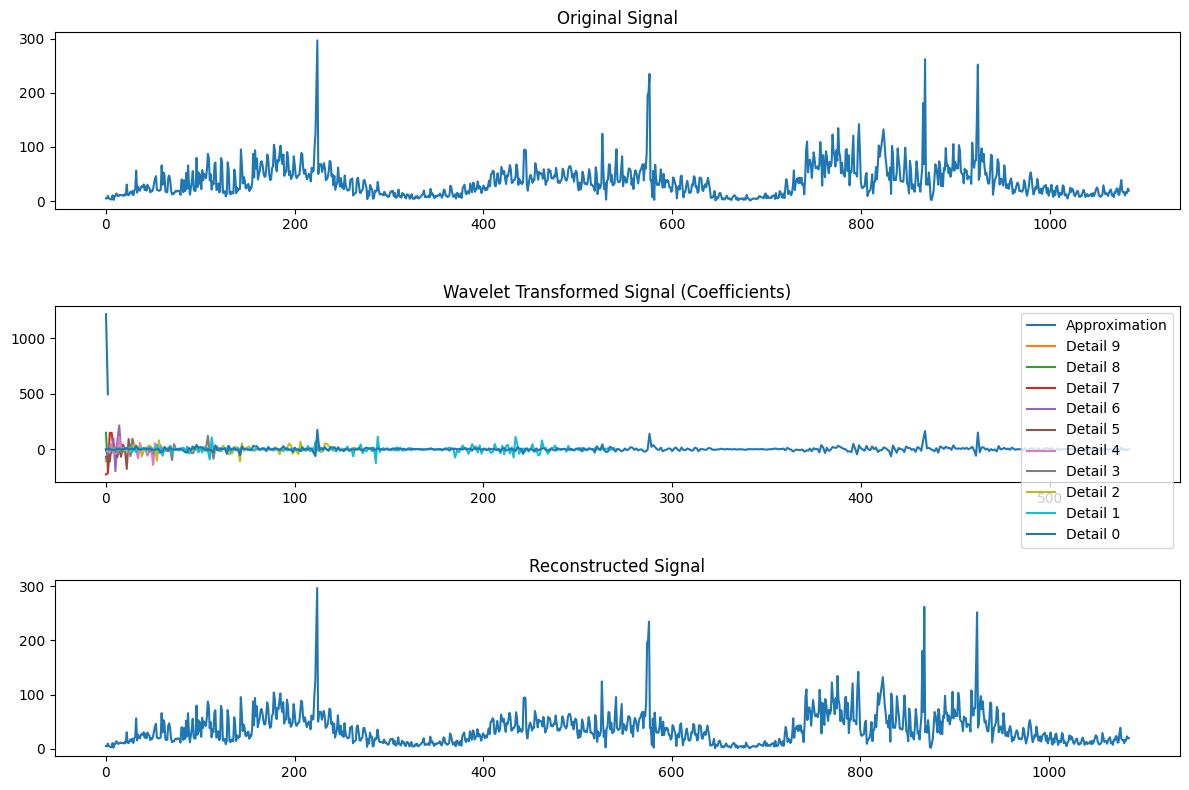

In [104]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

# 假设 df 是包含蔬菜销量数据的 DataFrame，'日期' 是日期列，'水生根茎类_销量(千克)' 是该蔬菜类别的销量列
# df = pd.read_csv('your_data.csv')

# 提取 '水生根茎类' 的销量数据
data = df['水生根茎类_销量(千克)'].dropna().values

# 使用小波变换进行分析
coeffs = pywt.wavedec(data, 'haar')

# 重构信号
reconstructed_signal = pywt.waverec(coeffs, 'haar')

# 绘图
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.title("Original Signal")
plt.plot(data)

plt.subplot(312)
plt.title("Wavelet Transformed Signal (Coefficients)")
for i, coeff in enumerate(coeffs):
    plt.plot(coeff, label=f'Detail {len(coeffs)-1-i}' if i else 'Approximation')
plt.legend()

plt.subplot(313)
plt.title("Reconstructed Signal")
plt.plot(reconstructed_signal)

plt.tight_layout()
plt.savefig("小波分析.png")
plt.show()